# Data Cleaning Notebook

## Objectives

*   Evaluate missing data
*   Combine house size variables
*   Clean data

## Inputs

* outputs/datasets/collection/HeritageHousing.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Conclusions

 
  * Cleaned Data Pipeline

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues-P5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues-P5'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HeritageHousing.csv")
    )
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Missing Data

First let's remind ourselves of the columns that have missing data.

In [5]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

First we replace all the columns of missing data related to square footing or size of the feature with 0, assuming that a missing value means that the house simply doesn't have one. For example, WoodDeckSF of which almost 90% of the data is missing.

In [6]:
df['2ndFlrSF'].fillna(0, inplace=True)
df['EnclosedPorch'].fillna(0, inplace=True)
df['LotFrontage'].fillna(0, inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['WoodDeckSF'].fillna(0, inplace=True)

In [7]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['BedroomAbvGr', 'BsmtFinType1', 'GarageFinish', 'GarageYrBlt']

Next is Bedroom Above Grade

In [8]:
df['BedroomAbvGr'].isnull().sum()

99

We don't know what the 'grade' is and this column isn't missing too much data so it's fine to drop it. Perhaps with more understanding of what the variable is, we could estimate the number of Bedrooms above grade based on other houses vs their overall size and perhaps quality. 

In [9]:
df.dropna(subset=['BedroomAbvGr'], inplace=True)

In [10]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['BsmtFinType1', 'GarageFinish', 'GarageYrBlt']

Next, there are two columns of missing data for the garages. So let's take a look at them and the garage area before making any changes.

In [11]:
df_nan_finish = df[df['GarageFinish'].isna()]
df_nan_finish[['GarageFinish','GarageYrBlt', 'GarageArea', 'YearBuilt']]

,GarageFinish,GarageYrBlt,GarageArea,YearBuilt
7,NaN,1973.0,484,1973
12,NaN,1962.0,352,1962
23,NaN,1976.0,572,1976
27,NaN,2008.0,772,2007
35,NaN,2004.0,691,2004
...,...,...,...,...
1401,NaN,2004.0,398,2004
1415,NaN,2007.0,660,2007
1438,NaN,1957.0,923,1957
1442,NaN,2008.0,812,2008


In [12]:
df_nan_year = df[df['GarageYrBlt'].isna()]
df_nan_year[['GarageFinish','GarageYrBlt', 'GarageArea']]

,GarageFinish,GarageYrBlt,GarageArea
48,None,NaN,0
78,None,NaN,0
88,None,NaN,0
89,None,NaN,0
99,None,NaN,0
...,...,...,...
1349,None,NaN,0
1407,None,NaN,0
1449,None,NaN,0
1450,None,NaN,0


There doesn't seem to be any clear indicator of what the best way to set the garage finish as would be. 
It also showed no correlation against the sale price in our initial study of the data.

And for garage year built we can see the NaN values are appearing where a house doesn't have a garage. 
We can't set this value to 0 but there's a clear indication that most houses are built with a garage by having the same YearBuilt and GarageYrBlt dates.

We can come back to these variables after some further analysis where we'll likely fill GarageYrBlt with the same value as the YearBuilt and drop the GarageFinish column. 

Lastly, we look at the Basement Finish Type.

In [14]:
df['BsmtFinType1'].value_counts()

Unf     371
GLQ     361
ALQ     187
BLQ     124
Rec     119
LwQ      63
None     30
Name: BsmtFinType1, dtype: int64

We know from our initial study of the data that this variable shows between negative low to positive low correlation against the sale price of a house and isn't important. So we can confiedently fill in the missing values as Unf.

In [15]:
df['BsmtFinType1'].fillna(value='Unf', inplace=True)
df['BsmtFinType1'].value_counts()

Unf     371
GLQ     361
ALQ     187
None    136
BLQ     124
Rec     119
LwQ      63
Name: BsmtFinType1, dtype: int64

# Further Predictive Power Score and Correlation Study

Let's run some more analysis on the data before we continue.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()



def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Power Predictive Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [18]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  552.0  0.051  0.101  0.0  0.0  0.0  0.056  0.694






*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



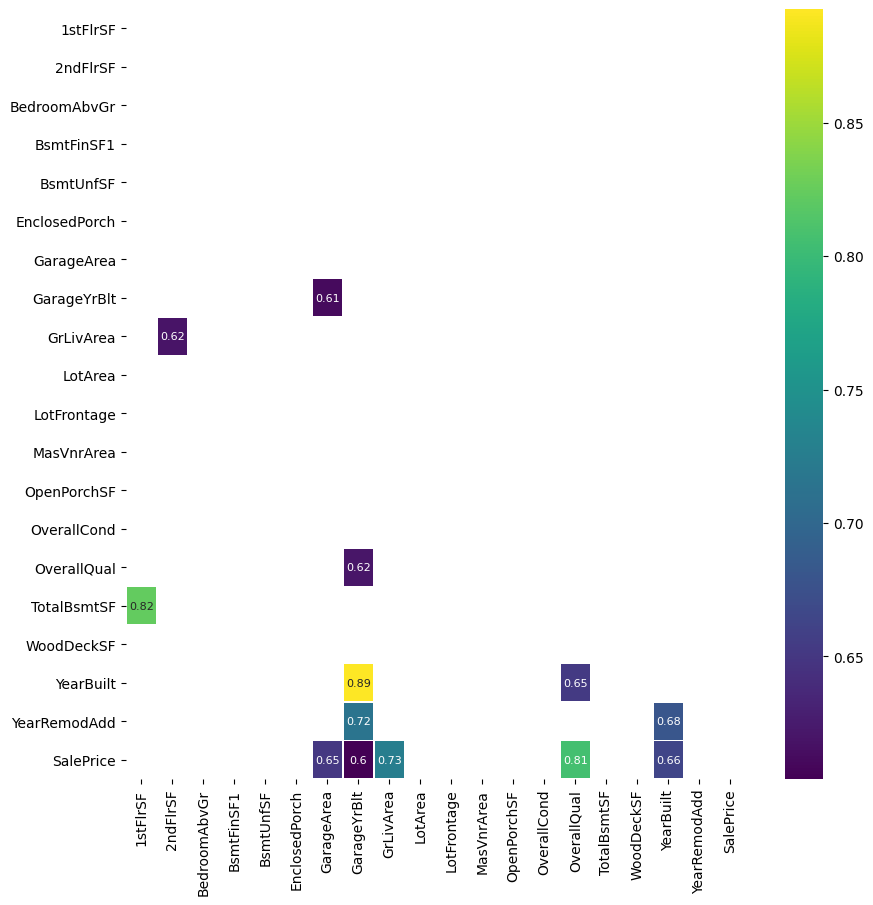



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



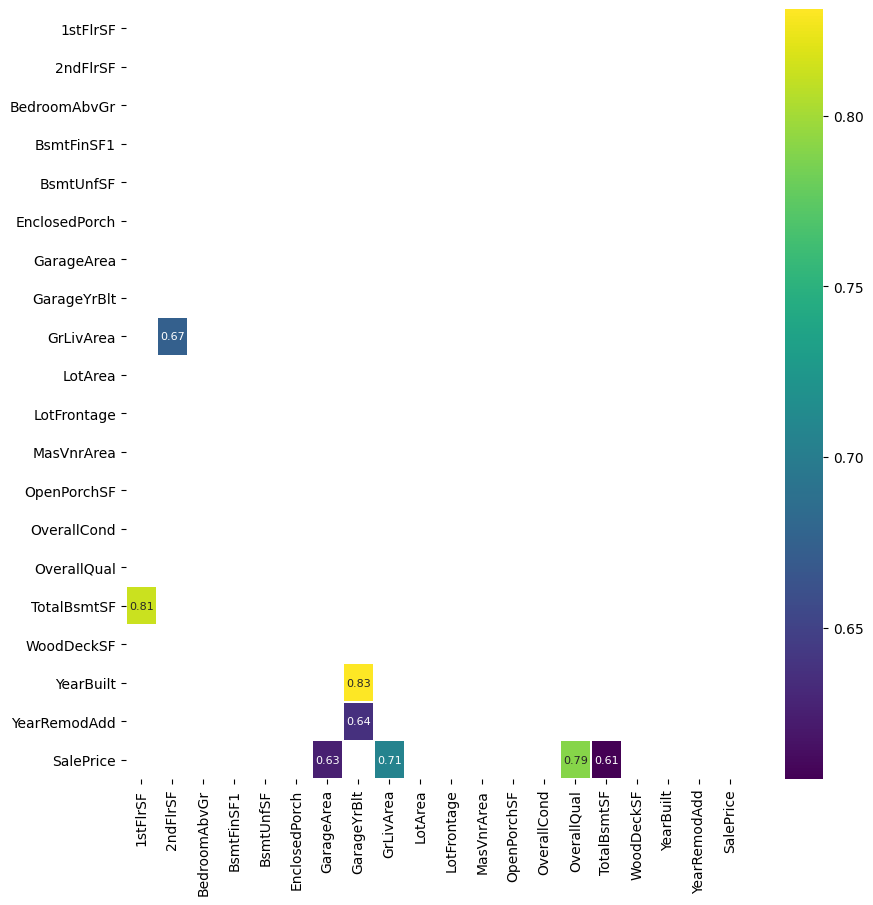



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



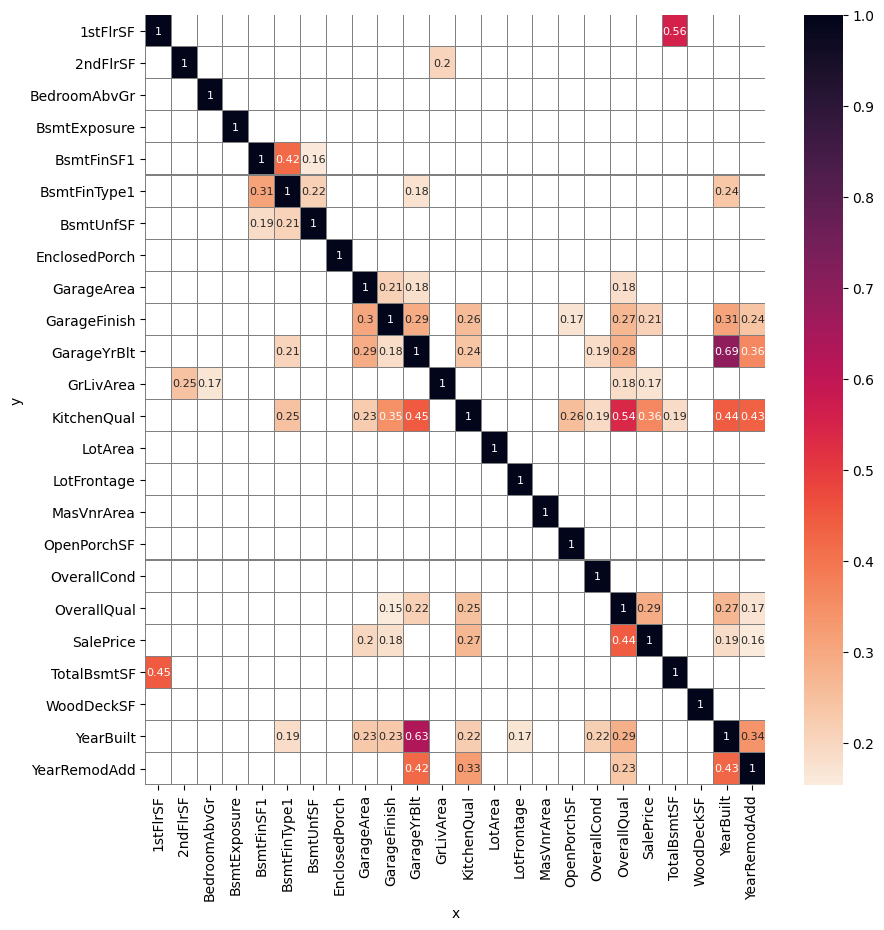

In [23]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman, 
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.6, PPS_Threshold=0.15,
                  figsize=(10,10), font_annot=8)

---

NOTE

* You may add how many sections you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section for "Conclusions and Next Steps" and state your conclusions and next steps.

In [16]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (2852421808.py, line 5)